In [117]:
import pandas as pd

In [137]:
df = pd.read_csv("ipl_2022_stats.csv")
df

,date,ground,margin,team_1,team_2,winner
0,"Mar 26, 2022",Wankhede,6 wickets,Super Kings,KKR,KKR
1,"Mar 27, 2022",Brabourne,4 wickets,Capitals,Mumbai,Capitals
2,"Mar 27, 2022",DY Patil,5 wickets,Punjab Kings,RCB,Punjab Kings
3,"Mar 28, 2022",Wankhede,5 wickets,Titans,Super Giants,Titans
4,"Mar 29, 2022",Pune,61 runs,Sunrisers,Royals,Royals
...,...,...,...,...,...,...
69,"May 22, 2022",Wankhede,5 wickets,Sunrisers,Punjab Kings,Punjab Kings
70,"May 24, 2022",Eden Gardens,7 wickets,Titans,Royals,Titans
71,"May 25, 2022",Eden Gardens,14 runs,Super Giants,RCB,RCB
72,"May 27, 2022",Ahmedabad,7 wickets,Royals,RCB,Royals


In [121]:
# Getting count of team wins and team played in the form of dictionary
def get_data_count(data):
    obj = {}
    for d in df[data]:
        if d in obj:
            obj[d] += 1
        else:
            obj[d] = 1
    return obj

# Getting total team wins, loses and played
def get_team_stats(team_played, team_wins):
    teams_lost = {}
    team_stats = {}
    
    # getting total no of matches played
    for k, v in get_data_count("team_2").items():
        if k in team_played:
            team_played[k] += v
    
    # getting total no of matches losed
    for team in team_played.keys():
        teams_lost[team] = team_played[team] - team_wins[team]

    # combining wins, loses and played into one dictionary
    team_stats["played"] = team_played
    team_stats["wins"] = team_wins
    team_stats["loses"] = teams_lost
    
    return team_stats
    
    
# stroing data into below variable    
team_stats = get_team_stats(get_data_count("team_1"), get_data_count("winner"))

In [122]:
# Converting dictionary into data frame
matches_df = pd.DataFrame.from_dict(team_stats)

# Sorting data frame by wins
matches_df.sort_values("wins", ascending=False)

,played,wins,loses
Titans,16,12,4
Royals,17,10,7
RCB,16,9,7
Super Giants,15,9,6
Capitals,14,7,7
Punjab Kings,14,7,7
Sunrisers,14,6,8
KKR,14,6,8
Super Kings,14,4,10
Mumbai,14,4,10


<AxesSubplot:title={'center':'IPL-2022 Team Stats'}>

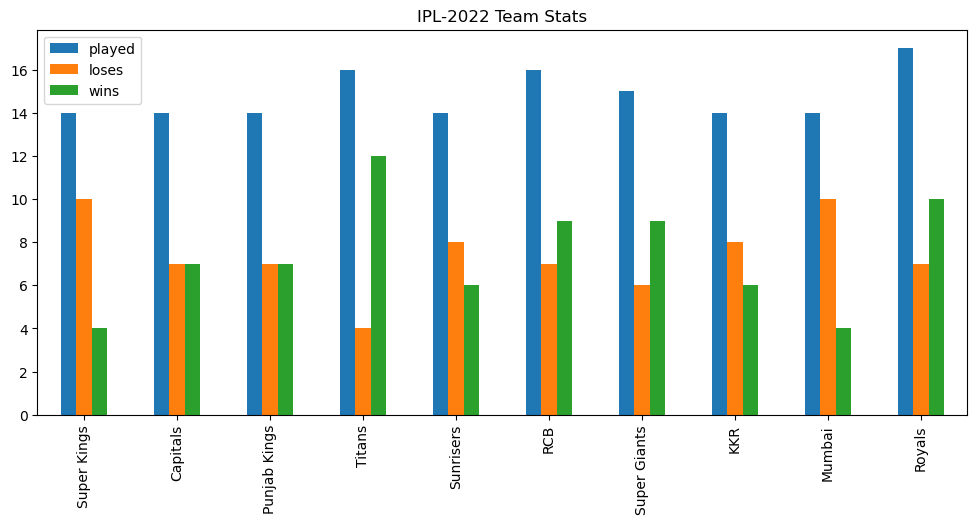

In [138]:
matches_df.plot(kind="bar" ,y=["played", "loses", "wins"], figsize=(12,5), title="IPL-2022 Team Stats")